In [3]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

time_out = 10
#60 seconds

zumi = Zumi()
zumi.reset_gyro()
zumi.mpu.calibrate_MPU()

zumi.MIN_I2C_DELAY = 0.01
#create list for the readings to be graphed
time_list = []
batt_list = []
vcc_list = []

time_passed = 0
init_time = time.time()

while(time_passed <= time_out):
    data = zumi.get_all_arduino_data()

    batt= data[6]
    vcc = data[7]
    time_passed = time.time()-init_time
    #print(batt)
    
    #add data to lists
    time_list.append(time_passed)
    batt_list.append(batt)
    vcc_list.append(vcc)

print("done")
print("samples per second")
print(len(time_list)/time_passed)




Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Creating new offset file...
.
.
done
samples per second
84.04708463278061


[12, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,

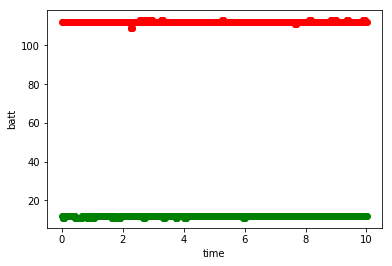

In [4]:
plt.plot(time_list,batt_list,'go',time_list,vcc_list,'ro')
print(batt_list)
plt.ylabel('batt')
plt.xlabel('time')
plt.show()

In [15]:
from zumi.util.camera import Camera
from zumi.util.screen import Screen
import cv2
import IPython.display
import PIL.Image
import time

screen = Screen()
#camera = Camera(320,240)
#width = 640#160 
#height = 480#120
width = 320#160 
height = 240#120
camera = Camera(width,height)

camera.start_camera()

time_out = 30

zumi = Zumi()

zumi.MIN_I2C_DELAY = 0.01
#create list for the readings to be graphed
time_list = []
batt_list = []
vcc_list = []

time_passed = 0
init_time = time.time()


try: 
    
    for i in range(300):
        
        data = zumi.get_all_arduino_data()

        batt= data[6]/60
        vcc = data[7]/48
        time_passed = time.time()-init_time
    
        #add data to lists
        time_list.append(time_passed)
        batt_list.append(batt)
        vcc_list.append(vcc)
        
    while(time_passed <= time_out):
        
        data = zumi.get_all_arduino_data()

        batt= data[6]/60
        vcc = data[7]/48
        time_passed = time.time()-init_time
    
        #add data to lists
        time_list.append(time_passed)
        batt_list.append(batt)
        vcc_list.append(vcc)
        
        IPython.display.display(PIL.Image.fromarray(camera.capture()))
        IPython.display.clear_output(wait=True) 

finally:
    camera.close()
    plt.plot(time_list,batt_list,'go',time_list,vcc_list,'ro')
    plt.ylabel('batt')
    plt.xlabel('time')
    plt.show()

Closing PiCamera


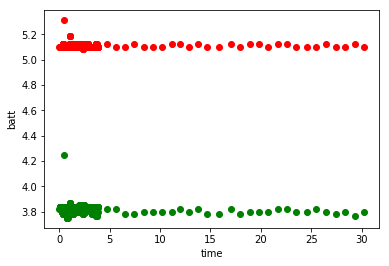